🎯 Desafio dia 84 — Entregas de E-commerce

📂 Dataset: desafio_dia_84_entregas_ecommerce.csv

🔍 Contexto: Uma empresa de e-commerce deseja analisar o desempenho de suas entregas com base na categoria dos produtos, tempo de entrega, transportadora utilizada e status final da entrega.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em dias_entrega com a média da coluna.

📊 Análise geral
- Qual transportadora apresenta o maior número de entregas atrasadas?

- Qual é o tempo médio de entrega por categoria de produto?

📈 Visualização de dados
- Crie um gráfico de barras com o número de pedidos por status_entrega.

🤖 Machine Learning - Classificação
- Crie um modelo para prever o status_entrega com base nas colunas:

categoria_produto, transportadora, dias_entrega

Utilize:

train_test_split

get_dummies

RandomForestClassifier

Avalie o modelo com accuracy_score.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("desafio_dia_84_entregas_ecommerce.csv")
df.head()

,id_pedido,categoria_produto,transportadora,dias_entrega,status_entrega
0,10001,Casa,Motoboy,NaN,Entregue
1,10002,Moda,Correios,1.9,Entregue
2,10003,Moda,Correios,4.8,Atrasada
3,10004,Eletrônicos,Correios,3.6,Entregue
4,10005,Esportes,Motoboy,2.8,Entregue


In [3]:
#Preencha os valores ausentes em dias_entrega com a média da coluna.
df["dias_entrega"] =  df["dias_entrega"].fillna(df["dias_entrega"].mean())
df["dias_entrega"].isna().sum()

0

In [9]:
#Qual transportadora apresenta o maior número de entregas atrasadas?
atrasadas = df[df["status_entrega"] == "Atrasada"]
mais_atrasos = atrasadas["transportadora"].value_counts()
print(mais_atrasos)

transportadora
Correios            34
Loggi               19
Transportadora X    17
Motoboy              6
Name: count, dtype: int64


In [11]:
#Qual é o tempo médio de entrega por categoria de produto?
tempo_medio_entrega_categoria = df.groupby("categoria_produto")["dias_entrega"].mean()
print(tempo_medio_entrega_categoria.round(2))

categoria_produto
Beleza         5.01
Casa           4.84
Eletrônicos    5.21
Esportes       5.21
Livros         5.41
Moda           5.04
Name: dias_entrega, dtype: float64


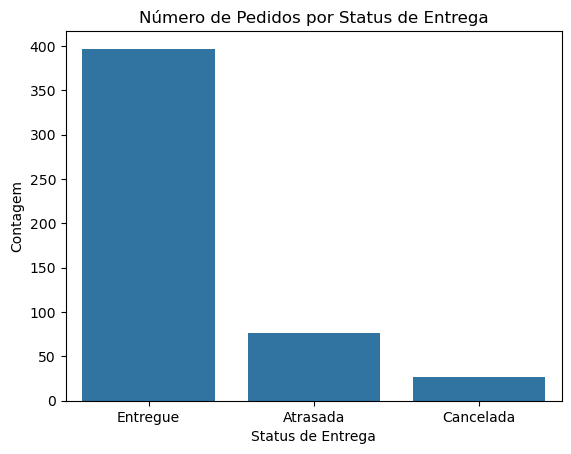

In [13]:
#Crie um gráfico de barras com o número de pedidos por status_entrega.
sns.countplot(data=df, x="status_entrega")
plt.title("Número de Pedidos por Status de Entrega")
plt.xlabel("Status de Entrega")
plt.ylabel("Contagem")
plt.show()

In [14]:
#Crie um modelo para prever o status_entrega com base nas colunas:
X = df[["categoria_produto", "transportadora", "dias_entrega"]]
y = df["status_entrega"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6533333333333333
